In [4]:
import sys
 
# add python folder
sys.path.insert(0, 'python')

import pyspark
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.ml.feature import VectorAssembler
from pyspark.sql import functions as F
from pyspark.ml.linalg import Vectors, DenseVector
from pyspark.mllib.clustering import KMeans, KMeansModel
import numpy
import os
import sys
from numpy import array
from math import sqrt
import matplotlib.pyplot as plt
from batch import batch
import numpy as np

sc =SparkContext()

23/01/11 09:12:14 WARN SparkContext: Another SparkContext is being constructed (or threw an exception in its constructor). This may indicate an error, since only one SparkContext should be running in this JVM (see SPARK-2243). The other SparkContext was created at:
org.apache.spark.api.java.JavaSparkContext.<init>(JavaSparkContext.scala:58)
sun.reflect.NativeConstructorAccessorImpl.newInstance0(Native Method)
sun.reflect.NativeConstructorAccessorImpl.newInstance(NativeConstructorAccessorImpl.java:62)
sun.reflect.DelegatingConstructorAccessorImpl.newInstance(DelegatingConstructorAccessorImpl.java:45)
java.lang.reflect.Constructor.newInstance(Constructor.java:423)
py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:247)
py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
py4j.Gateway.invoke(Gateway.java:238)
py4j.commands.ConstructorCommand.invokeConstructor(ConstructorCommand.java:80)
py4j.commands.ConstructorCommand.execute(ConstructorCommand.java:69)
py4j.ClientServ

KeyboardInterrupt: 

23/01/11 09:42:44 ERROR YarnClientSchedulerBackend: The YARN application has already ended! It might have been killed or the Application Master may have failed to start. Check the YARN application logs for more details.
23/01/11 09:42:44 ERROR SparkContext: Error initializing SparkContext.
org.apache.spark.SparkException: Application application_1673133383379_0014 was killed by user ubuntu at 192.168.4.83
	at org.apache.spark.scheduler.cluster.YarnClientSchedulerBackend.waitForApplication(YarnClientSchedulerBackend.scala:98)
	at org.apache.spark.scheduler.cluster.YarnClientSchedulerBackend.start(YarnClientSchedulerBackend.scala:65)
	at org.apache.spark.scheduler.TaskSchedulerImpl.start(TaskSchedulerImpl.scala:222)
	at org.apache.spark.SparkContext.<init>(SparkContext.scala:585)
	at org.apache.spark.api.java.JavaSparkContext.<init>(JavaSparkContext.scala:58)
	at sun.reflect.NativeConstructorAccessorImpl.newInstance0(Native Method)
	at sun.reflect.NativeConstructorAccessorImpl.newInstanc

### K-means implementing MLib
Code example is obtained from: https://spark.apache.org/docs/1.5.1/mllib-clustering.html

In [20]:
# os.environ['PYSPARK_PYTHON'] = sys.executable
# Load and parse the data
data = sc.textFile("/home/ubuntu/protein/sampled_embeddings_reduced.csv")
parsedData = data.map(lambda line: array([float(x) for x in line.split(',')[1:]]))

# Build the model (cluster the data)
clusters = KMeans.train(parsedData, 2, maxIterations=10, initializationMode="random")

# Evaluate clustering by computing Within Set Sum of Squared Errors
def error(point):
    center = clusters.centers[clusters.predict(point)]
    return sqrt(sum([x**2 for x in (point - center)]))

WSSSE = parsedData.map(lambda point: error(point)).reduce(lambda x, y: x + y)
print("Within Set Sum of Squared Error = " + str(WSSSE))

# Save and load model
clusters.save(sc, "target/org/apache/spark/PythonKMeansExample/KMeansModel")
sameModel = KMeansModel.load(sc, "target/org/apache/spark/PythonKMeansExample/KMeansModel")

Within Set Sum of Squared Error = 96046.53949130067


Py4JJavaError: An error occurred while calling o105.save.
: org.apache.hadoop.mapred.FileAlreadyExistsException: Output directory hdfs://master:9000/user/ubuntu/target/org/apache/spark/PythonKMeansExample/KMeansModel/metadata already exists
	at org.apache.hadoop.mapred.FileOutputFormat.checkOutputSpecs(FileOutputFormat.java:131)
	at org.apache.spark.internal.io.HadoopMapRedWriteConfigUtil.assertConf(SparkHadoopWriter.scala:299)
	at org.apache.spark.internal.io.SparkHadoopWriter$.write(SparkHadoopWriter.scala:71)
	at org.apache.spark.rdd.PairRDDFunctions.$anonfun$saveAsHadoopDataset$1(PairRDDFunctions.scala:1091)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:406)
	at org.apache.spark.rdd.PairRDDFunctions.saveAsHadoopDataset(PairRDDFunctions.scala:1089)
	at org.apache.spark.rdd.PairRDDFunctions.$anonfun$saveAsHadoopFile$4(PairRDDFunctions.scala:1062)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:406)
	at org.apache.spark.rdd.PairRDDFunctions.saveAsHadoopFile(PairRDDFunctions.scala:1027)
	at org.apache.spark.rdd.PairRDDFunctions.$anonfun$saveAsHadoopFile$3(PairRDDFunctions.scala:1009)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:406)
	at org.apache.spark.rdd.PairRDDFunctions.saveAsHadoopFile(PairRDDFunctions.scala:1008)
	at org.apache.spark.rdd.PairRDDFunctions.$anonfun$saveAsHadoopFile$2(PairRDDFunctions.scala:965)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:406)
	at org.apache.spark.rdd.PairRDDFunctions.saveAsHadoopFile(PairRDDFunctions.scala:963)
	at org.apache.spark.rdd.RDD.$anonfun$saveAsTextFile$2(RDD.scala:1599)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:406)
	at org.apache.spark.rdd.RDD.saveAsTextFile(RDD.scala:1599)
	at org.apache.spark.rdd.RDD.$anonfun$saveAsTextFile$1(RDD.scala:1585)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:406)
	at org.apache.spark.rdd.RDD.saveAsTextFile(RDD.scala:1585)
	at org.apache.spark.mllib.clustering.KMeansModel$SaveLoadV2_0$.save(KMeansModel.scala:208)
	at org.apache.spark.mllib.clustering.KMeansModel.save(KMeansModel.scala:130)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Thread.java:750)


In [3]:
print("" + len(data))
print("Final centers: " + str(sameModel.clusterCenters))
print("Total Cost: " + str(sameModel.computeCost(parsedData)))

Final centers: [DenseVector([0.0131, -0.0069, 0.0171, 0.01, -0.0048, 0.0226, -0.0237, -0.0754, 0.0129, 0.0054, -0.0294, 0.0238, 0.0134, 0.0029, 0.0225, 0.0091, 0.0029, 0.0129, 0.0172, -0.0065, -0.0235, 0.0019, -0.0072, 0.0076, -0.0059, -0.0018, -0.0008, -0.0154, -0.0074, 0.0074, -0.0032, 0.0408, -0.1218, 0.0088, -0.1135, 0.0096, -0.0036, -0.007, 0.0057, 0.0202, 0.0026, -0.0289, -0.0195, 0.0039, 0.0117, -0.0041, -0.0042, 0.0053, -0.0163, 0.0151, -0.0264, -0.0113, -0.0092, -0.0158, 0.0569, -0.0035, -0.0012, -0.0244, -0.0182, 0.0051, -0.0108, 0.0259, -0.003, 0.0196, -0.0191, 0.0277, 0.003, -0.0083, 0.0004, -0.0216, -0.0252, -0.0079, -0.116, -0.0026, -0.007, 0.0154, 0.0131, -0.0119, -0.0047, 0.0186, -0.0023, 0.0149, 0.001, 0.0092, -0.0086, -0.0141, 0.0077, 0.0072, -0.0084, 0.0184, 0.003, -0.0098, 0.0136, -0.003, -0.0399, -0.0155, -0.026, 0.0184, -0.0101, -0.0137, -0.0167, 0.0077, -0.0047, -0.0025, 0.0155, 0.0138, 0.0092, -0.0146, -0.0185, -0.0438, 0.0147, 0.0002, -0.0202, 0.0066, 0.0078, 0

Total Cost: 97324.34507387501


AttributeError: 'KMeansModel' object has no attribute 'transform'

In [9]:
filename = "/home/ubuntu/sampled_embeddings.csv"
features = 1024

batch_01 = batch()
batch_01.load(filename, 1, 1000)

# Create matrix in correct format
X = np.empty((len(batch_01.items), features), dtype=np.float16)
for i in range(len(batch_01.items)):
    X[i,:] = batch_01.items[i].data

2


IndexError: list index out of range

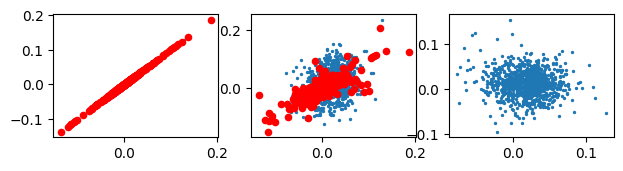

In [19]:

cc = sameModel.clusterCenters

ctr = []
cn01 = 0
for center in cc:
    ctr.append(center)
    cn01 = cn01 + 1

print(cn01)


# Plot classification
f1 = 0
f2 = 0

fig = plt.figure(figsize=(20, 15))
fig.tight_layout()


plotNo = 8
for i in range(0, plotNo):
    for j in range(0, plotNo):
        s1 = plt.subplot(plotNo, plotNo, i*plotNo + j + 1)
        s1.scatter(X[:, f1 + i], X[:, f2 + j], s = 2)
        s1.scatter(cc[f1 + i], cc[f2 + j], c = "r", s = 20)

plt.show() 